Our project is to uncover patterns in music on Spotify between 2010 and 2019. We'll examine musical trends and genres through the years; which artists appeared most frequently.

* What is the most popular genre?

* What is the least popular genre?

* Who is the most popular artist?

* Who is the least popular artist?

* Did we see artists make the top ten for various years or just one?

* Do beats per minute correlate to ‘dancibility’?

* What is the statistical analysis for beats per minute?

* Are any of the songs outliers?



# Tasks
* Collect the Data
* Clean and merge data
* Explore the data
* Create Analysis
* Create the Presentation

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import scipy.stats as stats
from scipy.stats import iqr
from scipy.stats import linregress




In [2]:
#Import data
music_data_to_load = "top10s.csv"

In [3]:
music_data_to_load


'top10s.csv'

In [4]:
# Data File and store into Pandas DataFrames
music_data_pd = pd.read_csv(music_data_to_load, sep=',', encoding='latin-1')
music_data_pd.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
correlation_matrix = music_data_pd.corr()
correlation_matrix

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,1.000000,0.989083,-0.110593,-0.212203,0.083060,-0.177057,-0.128305,-0.126515,-0.210990,0.097539,0.015200,0.159487
year,0.989083,1.000000,-0.101932,-0.225296,0.085272,-0.179094,-0.135352,-0.120510,-0.215458,0.102411,0.005789,0.249841
bpm,-0.110593,-0.101932,1.000000,0.095070,-0.176331,0.048817,0.072284,-0.002492,-0.029381,-0.121118,0.051148,-0.018128
nrgy,-0.212203,-0.225296,0.095070,1.000000,0.137382,0.663623,0.180074,0.400945,-0.145399,-0.576507,0.100965,-0.093693
dnce,0.083060,0.085272,-0.176331,0.137382,1.000000,0.129737,-0.040512,0.494928,-0.179794,-0.250560,-0.037757,0.082394
dB,-0.177057,-0.179094,0.048817,0.663623,0.129737,1.000000,0.062574,0.342983,-0.168415,-0.349600,-0.061267,0.014400
live,-0.128305,-0.135352,0.072284,0.180074,-0.040512,0.062574,1.000000,0.015081,0.098645,-0.099917,0.141947,-0.087770
val,-0.126515,-0.120510,-0.002492,0.400945,0.494928,0.342983,0.015081,1.000000,-0.263175,-0.252936,0.118355,0.021746
dur,-0.210990,-0.215458,-0.029381,-0.145399,-0.179794,-0.168415,0.098645,-0.263175,1.000000,0.091917,0.054747,-0.105707
acous,0.097539,0.102411,-0.121118,-0.576507,-0.250560,-0.349600,-0.099917,-0.252936,0.091917,1.000000,0.001483,0.021837


In [6]:
#plt.scatter(music_data_pd["bpm"], music_data_pd["dnce"], facecolor="blue", edgecolor="black")
#plt.scatter

In [7]:
#linear regression
# vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(music_data_pd["bpm"], music_data_pd["dnce"])
# vc_r

In [8]:
# vc_fit = vc_slope * music_data_pd["bpm"] + vc_int
# vc_fit

In [9]:


def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    




In [10]:
equation = linear_agression(music_data_pd["bpm"], music_data_pd["dnce"])
annotate(equation, 50, 10)
plt.title("Dancibility vs Beats per Minute")
plt.xlabel("BPM")
plt.ylabel("DNCE")
plt.savefig("images/Dancibility vs Beats per Minute.png")


NameError: name 'st' is not defined

In [11]:
 music_data_pd["top genre"].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
big room                      10
british soul                  10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
edm                            5
australian pop                 5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
folk-pop                       2
brostep                        2
electro                        2
electronic trap                2
downtempo                      2
indie pop                      2
belgian edm                    2
detroit hip hop                2
acoustic p

In [12]:
top_genre_df = pd.DataFrame({"total":  music_data_pd["top genre"].value_counts()})
top_genre_df.head()

,total
dance pop,327
pop,60
canadian pop,34
boy band,15
barbadian pop,15


In [13]:
# Determine most popular genre overall 
# top_genre = music_data_pd.groupby(["top genre"])
top_genre_df = pd.DataFrame({"total":  music_data_pd["top genre"].value_counts()})
top_genre_df = top_genre_df.sort_values("total", ascending=False)
top_genre_df
top_genre_df.reset_index(inplace=True)
top_genre_df
top_genre_df.columns = ["genre", "total"]
top_genre_df

,genre,total
0,dance pop,327
1,pop,60
2,canadian pop,34
3,boy band,15
4,barbadian pop,15
5,electropop,13
6,big room,10
7,british soul,10
8,canadian contemporary r&b,9
9,neo mellow,9


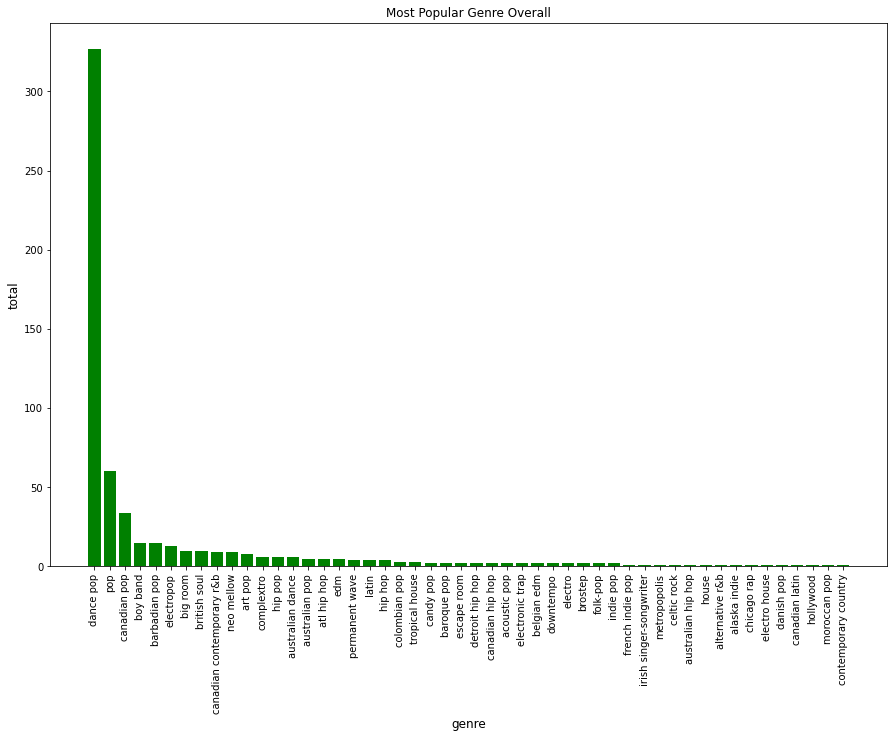

<Figure size 432x288 with 0 Axes>

In [14]:
# Graph popular genre overall
plt.figure(figsize=[15,10])
x_values=top_genre_df['genre']
y_values=top_genre_df['total']

plt.bar(x_values, y_values, color = 'g')
plt.xlabel('genre', fontsize = 12)
plt.xticks(rotation='vertical')

plt.ylabel('total', fontsize = 12)
plt.title('Most Popular Genre Overall')
plt.show()

# save plot as .pngs
plt.savefig("images/Most Popular Genre Overall.png")



In [15]:
# top_genre_year_df = music_data_pd.groupby(["year", "top genre"]).count()

# top_genre_year_df.head()

In [16]:
# Determine most popular genre by year
top_genre_year_df = music_data_pd.groupby(["year", "top genre"]).count()
top_genre_year_df = top_genre_year_df.sort_values(["year", "Unnamed: 0"], ascending=False)
#top_genre_year_df.head()
clean_by_year_df = top_genre_year_df.drop(['title', 'artist', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                           'acous', 'spch', 'pop' ], axis=1)
#clean_by_year_df

cleaner_by_year_df = clean_by_year_df[(clean_by_year_df['Unnamed: 0']>11)]
cleaner_by_year_df.reset_index(inplace=True)
cleaner_by_year_df.columns = ["Year", "Top Genre", "Total"]
cleaner_by_year_df


,Year,Top Genre,Total
0,2018,dance pop,38
1,2017,dance pop,31
2,2016,dance pop,46
3,2015,dance pop,52
4,2014,dance pop,27
5,2013,dance pop,42
6,2012,dance pop,15
7,2011,dance pop,38
8,2010,dance pop,31


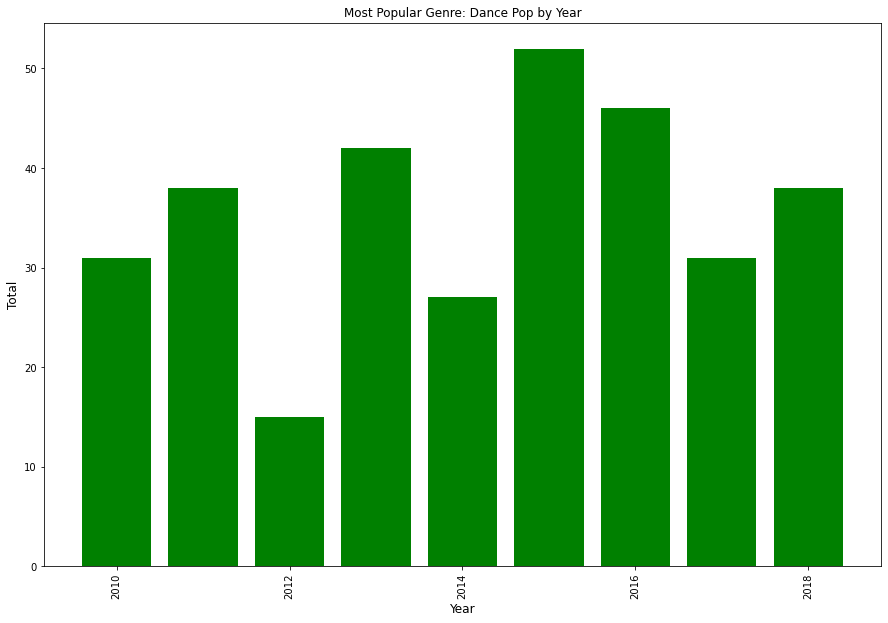

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=[15,10])
x_axis=cleaner_by_year_df['Year']
y_axis=cleaner_by_year_df['Total']

plt.bar(x_axis, y_axis, color = 'g')
plt.xlabel('Year', fontsize = 12)
plt.xticks(rotation='vertical')

plt.ylabel('Total', fontsize = 12)
plt.title('Most Popular Genre: Dance Pop by Year')
plt.show()

# save plot as .pngs
plt.savefig("images/Most Popular Genre Overall.png")


In [18]:
# Most popular artist overall
top_artist_df = pd.DataFrame({"total":  music_data_pd["artist"].value_counts()})
top_artist_df = top_artist_df[(top_artist_df['total']>9)]
top_artist_df = top_artist_df.sort_values("total", ascending=False)
top_artist_df.reset_index(inplace=True)
top_artist_df.columns = ["artist", "total"]
top_artist_df

,artist,total
0,Katy Perry,17
1,Justin Bieber,16
2,Maroon 5,15
3,Rihanna,15
4,Lady Gaga,14
5,Bruno Mars,13
6,Shawn Mendes,11
7,The Chainsmokers,11
8,Pitbull,11
9,Ed Sheeran,11


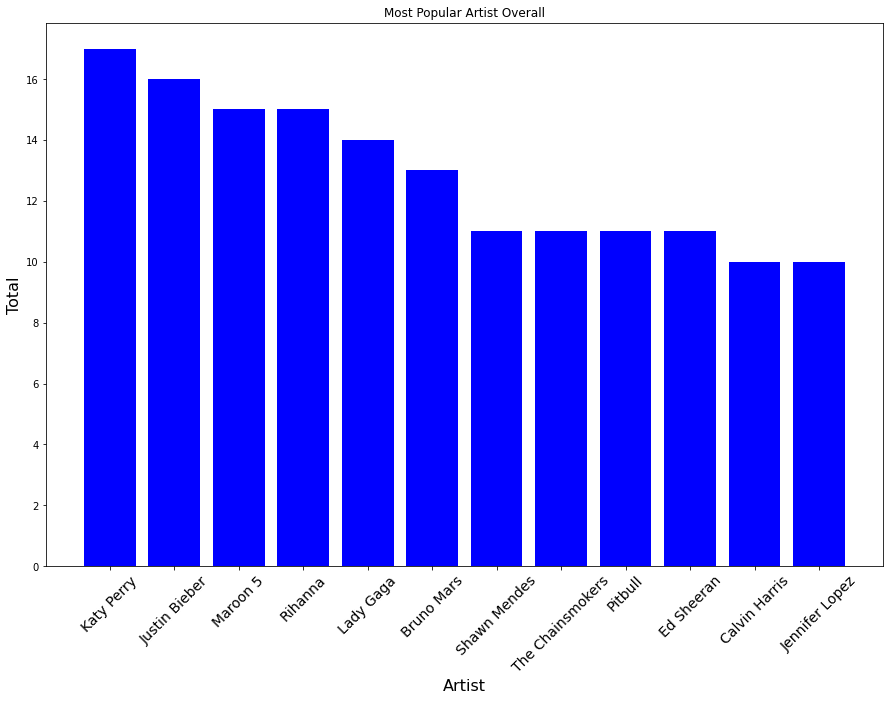

<Figure size 432x288 with 0 Axes>

In [19]:
# Graph most popular artist overall
plt.figure(figsize=[15,10])
x_values=top_artist_df['artist']
y_values=top_artist_df['total']

plt.bar(x_values, y_values, color = 'b')
plt.xlabel('Artist', fontsize = 16)
plt.xticks(rotation='45', fontsize = 14)

plt.ylabel('Total', fontsize = 16)
plt.title('Most Popular Artist Overall')
plt.show()

# save plot as .pngs
plt.savefig("images/Most Popular Artist Overall.png")

In [20]:
# Most popular artist by year
# Determine most popular artist by year
top_artist_year_df = music_data_pd.groupby(["year", "artist"]).count()
top_artist_year_df
top_artist_year_df = top_artist_year_df.sort_values(["year", "Unnamed: 0"], ascending=False)
top_artist_year_df.head()

#clean by year
clart_by_year_df = top_artist_year_df.drop(['title','top genre','bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                            'acous', 'spch', 'pop' ], axis=1)
#clart_by_year_df


clart_by_year_df = clart_by_year_df[(clart_by_year_df['Unnamed: 0']>=3)]
#clart_by_year_df
clart_by_year_df.reset_index(inplace=True)
clart_by_year_df.columns = ["Year", "Top Artist", "Total"]
clart_by_year_df


,Year,Top Artist,Total
0,2019,Ed Sheeran,5
1,2019,The Chainsmokers,3
2,2018,Shawn Mendes,4
3,2018,Dua Lipa,3
4,2018,Justin Timberlake,3
5,2018,Taylor Swift,3
6,2017,DNCE,3
7,2017,Katy Perry,3
8,2017,Lana Del Rey,3
9,2017,The Chainsmokers,3


In [21]:
# Most popular song overall
top_title_df = pd.DataFrame({"total":  music_data_pd["title"].value_counts()})
top_title_df = top_title_df[(top_title_df['total']>1)]
top_title_df = top_title_df.sort_values("total", ascending=False)
top_title_df.reset_index(inplace=True)
top_title_df.columns = ["title", "total"]
top_title_df

,title,total
0,Marry You,2
1,Love Yourself,2
2,Sugar,2
3,Written in the Stars (feat. Eric Turner),2
4,Say Something,2
5,Castle Walls (feat. Christina Aguilera),2
6,A Little Party Never Killed Nobody (All We Got),2
7,Kissing Strangers,2
8,Stitches,2
9,Hello,2


In [22]:
# Calculate the statistical analysis for beats per minute

bpm_df = music_data_pd.drop(['artist','Unnamed: 0', 'year', 'title','top genre', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                            'acous', 'spch', 'pop' ], axis=1)

bpm_df

bpm_df.describe()


,bpm
count,602.000000
mean,118.742525
std,24.339497
min,43.000000
25%,100.000000
50%,120.000000
75%,129.000000
max,206.000000


In [23]:
# music_data_pd["top genre"].value_counts()

In [24]:
music_data_pd.loc[music_data_pd["top genre"]=="neo mellow"]


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
210,211,All of Me,John Legend,neo mellow,2014,120,26,42,-7,13,33,270,92,3,86
246,247,Wings,Birdy,neo mellow,2014,83,71,47,-5,16,22,252,8,3,62
249,250,Say Something,A Great Big World,neo mellow,2014,138,15,45,-9,9,9,229,87,3,61
255,256,Not About Angels,Birdy,neo mellow,2014,116,14,41,-10,9,23,190,97,4,56
260,261,Tee Shirt - Soundtrack Version,Birdy,neo mellow,2014,76,34,68,-9,9,56,160,84,3,49
261,262,Words as Weapons,Birdy,neo mellow,2014,120,35,53,-9,14,19,239,28,3,44
426,427,Keeping Your Head Up,Birdy,neo mellow,2016,122,78,60,-5,19,53,208,16,5,52
431,432,Start,John Legend,neo mellow,2016,110,4,52,-15,9,26,310,99,4,47


In [25]:
low_bound = 100
high_bound = 129

title_list = []
genre_list = []
bpm_list = []

for index, row in music_data_pd.iterrows():
#     print(row["title"], row["bpm"])
    title = row["title"]
    genre = row["top genre"]
    bpm = row["bpm"]
    
    if (bpm < low_bound) or (bpm > high_bound):
        print(f"\"{title}\" in \"{genre}\" genre has bpm {bpm} is an outlier.") 
        title_list.append(title)
        genre_list.append(genre)
        bpm_list.append(bpm)
#         break

"Hey, Soul Sister" in "neo mellow" genre has bpm 97 is an outlier.
"Love The Way You Lie" in "detroit hip hop" genre has bpm 87 is an outlier.
"Baby" in "canadian pop" genre has bpm 65 is an outlier.
"Secrets" in "dance pop" genre has bpm 148 is an outlier.
"Empire State of Mind (Part II) Broken Down" in "hip pop" genre has bpm 93 is an outlier.
"Marry You" in "pop" genre has bpm 145 is an outlier.
"Cooler Than Me - Single Mix" in "dance pop" genre has bpm 130 is an outlier.
"OMG (feat. will.i.am)" in "atl hip hop" genre has bpm 130 is an outlier.
"Alejandro" in "dance pop" genre has bpm 99 is an outlier.
"Meet Me Halfway" in "dance pop" genre has bpm 130 is an outlier.
"Whataya Want from Me" in "australian pop" genre has bpm 186 is an outlier.
"All The Right Moves" in "dance pop" genre has bpm 146 is an outlier.
"Animal" in "indie pop" genre has bpm 148 is an outlier.
"Naturally" in "dance pop" genre has bpm 133 is an outlier.
"3" in "dance pop" genre has bpm 135 is an outlier.
"My Fi

In [26]:
df = pd.DataFrame({
    "Title": title_list,
    "Genre": genre_list,
    "BPM": bpm_list
})

outliers = df["Title"].count()

print(f"There are {outliers} outliers")

df.head()

There are 273 outliers


,Title,Genre,BPM
0,"Hey, Soul Sister",neo mellow,97
1,Love The Way You Lie,detroit hip hop,87
2,Baby,canadian pop,65
3,Secrets,dance pop,148
4,Empire State of Mind (Part II) Broken Down,hip pop,93


In [21]:
# Are any songs outliers for beats per minute? Graph box and whisker plot

In [22]:
dnce_df = music_data_pd.loc[music_data_pd['top genre'] == "dance pop"]

dnce_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
10,11,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,2010,128,87,62,-4,6,47,235,3,3,73


In [23]:
bpm_average_df = dnce_df.groupby(['dnce']).mean()
bpm_average_df.head()

,Unnamed: 0,year,bpm,nrgy,dB,live,val,dur,acous,spch,pop
dnce,,,,,,,,,,,
23,45.0,2010.0,43.0,39.0,-6.0,14.0,7.0,257.0,85.0,4.0,56.0
26,398.0,2016.5,185.0,52.5,-7.0,12.0,19.0,246.0,17.5,4.5,81.0
28,360.0,2015.0,112.0,37.0,-7.0,11.0,8.0,273.0,45.0,4.0,36.0
29,37.0,2010.0,164.0,41.0,-5.0,13.0,7.0,264.0,83.0,3.0,61.0
30,88.0,2011.0,63.0,38.0,-7.0,7.0,26.0,274.0,38.0,3.0,60.0


In [27]:
dnce_df = music_data_pd.loc[music_data_pd['top genre'] == "dance pop"]
dnce_df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
10,11,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,2010,128,87,62,-4,6,47,235,3,3,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop,2019,122,89,81,-4,8,61,229,2,4,84
594,595,No Guidance (feat. Drake),Chris Brown,dance pop,2019,93,45,70,-7,16,14,261,12,15,81
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70


In [24]:
# Do beats per minute correlate to ‘dancibility’? Graph results

In [36]:
bpm_average_df = dnce_df.groupby(['top genre']).mean()
bpm_average_df


,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
top genre,,,,,,,,,,,,
dance pop,289.363914,2014.348624,118.486239,72.825688,65.972477,-5.220183,18.816514,54.706422,224.608563,10.7737,8.899083,64.363914


In [42]:
clean_bpm_average_df = bpm_average_df.drop(['nrgy', 'dnce', 'dB', 'live', 'val', 'dur','year', 'Unnamed: 0',
                                            'acous', 'spch', 'pop' ], axis=1)
clean_bpm_average_df

,bpm
top genre,
dance pop,118.486239


In [25]:
#import scipy.stats as st

#dnce_df = music_data_pd.loc[music_data_pd['top genre'] == "dance pop"]
#average bpm for dance pop
#clean_bpm_average_df = dnce_df.groupby(['top genre']).mean()

# scipy.stats
# four types of correlations: Pearson correlation, Kendall rank correlation, 
# Spearman correlation, and the Point-Biserial correlation
#corr=round(st.pearsonr(bpm_average_df['dnce'],bpm_average_df['bpm'])[0],2)
#print(f"The correlation between dancibility and the average beats per minute is {corr}")

# model = st.linregress(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
# y_values = capomulin_average_df['Weight (g)']*model[0]+model[1]
# plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
# plt.plot(capomulin_average_df['Weight (g)'],y_values,color="red")
# plt.xlabel('Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')

# plt.show()

ValueError: x and y must have length at least 2.

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
10,11,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,2010,128,87,62,-4,6,47,235,3,3,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop,2019,122,89,81,-4,8,61,229,2,4,84
594,595,No Guidance (feat. Drake),Chris Brown,dance pop,2019,93,45,70,-7,16,14,261,12,15,81
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
